In [26]:
#Задания №2

In [24]:
#Загрузим необходимые библиотеки и посмотрим на данные
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

df = pd.read_csv(r'E:\data\junior\classification\data_classification_for_task.csv')

In [25]:
#Посмотрим данные 
df.head(5)

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
#Посмотрим на размер данных, названия признаков и их типы.
print(df.shape)
#Видим, что в таблице 303 строки и 14 столбцов. Выведем названия столбцов:

(303, 14)


In [27]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [28]:
print(df.columns)

Index(['AGE', 'GENDER', 'FEATURE_1', 'FEATURE_2', 'FEATURE_3', 'FEATURE_4',
       'FEATURE_5', 'FEATURE_6', 'FEATURE_7', 'FEATURE_8', 'FEATURE_9',
       'FEATURE_10', 'FEATURE_11', 'TARGET'],
      dtype='object')


In [29]:
#Чтобы посмотреть общую информацию по датафрейму и всем признакам, воспользуемся методом info:
print(df.info())
#int64, float64 t — это типы признаков. 16 признаков — числовые.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         303 non-null    int64  
 1   GENDER      303 non-null    int64  
 2   FEATURE_1   303 non-null    int64  
 3   FEATURE_2   303 non-null    int64  
 4   FEATURE_3   303 non-null    int64  
 5   FEATURE_4   303 non-null    int64  
 6   FEATURE_5   303 non-null    int64  
 7   FEATURE_6   303 non-null    int64  
 8   FEATURE_7   303 non-null    int64  
 9   FEATURE_8   303 non-null    float64
 10  FEATURE_9   303 non-null    int64  
 11  FEATURE_10  303 non-null    int64  
 12  FEATURE_11  303 non-null    int64  
 13  TARGET      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [30]:
df.describe(include=['float64', 'int64'])

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
df['TARGET'].value_counts()
#Видим что 165 человек больные

1    165
0    138
Name: TARGET, dtype: int64

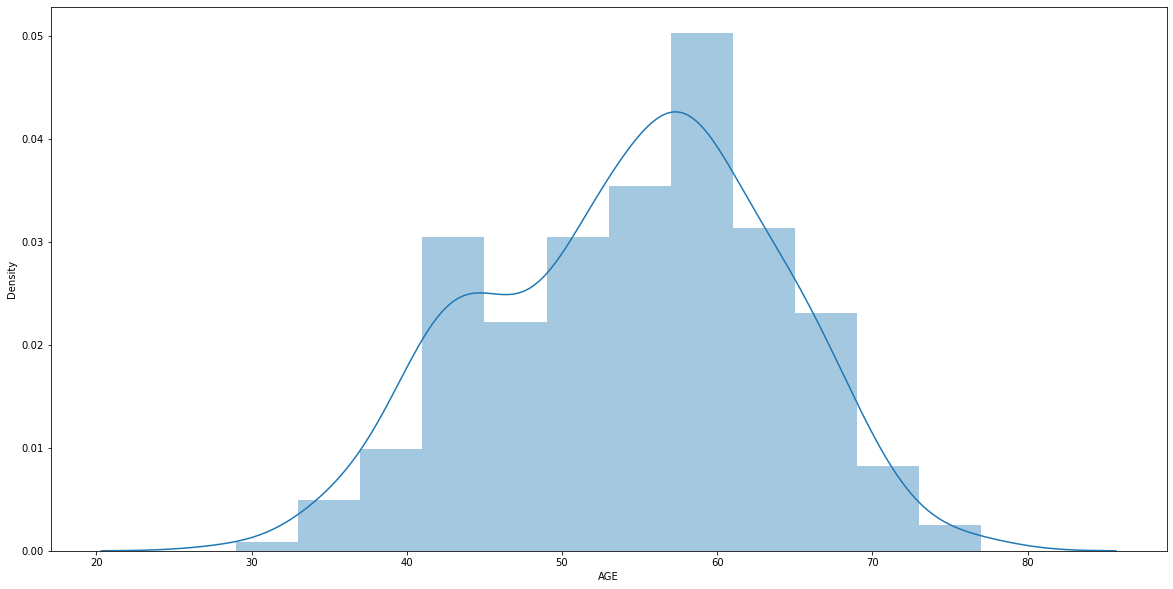

In [32]:
sns_plot = sns.distplot(df['AGE'])
fig = sns_plot.get_figure()
#Середий больних уофицент середи 58 лет

In [33]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [34]:
#Смотрим среднние 
df[df['TARGET'] == 1].mean()

AGE            52.496970
GENDER          0.563636
FEATURE_1       1.375758
FEATURE_2     129.303030
FEATURE_3     242.230303
FEATURE_4       0.139394
FEATURE_5       0.593939
FEATURE_6     158.466667
FEATURE_7       0.139394
FEATURE_8       0.583030
FEATURE_9       1.593939
FEATURE_10      0.363636
FEATURE_11      2.121212
TARGET          1.000000
dtype: float64

In [35]:
#Визивлизавруем скольео больных 
d = {'Yes' : 1, 'No' : 0}
X = df.drop('TARGET', axis=1)
y = df['TARGET']

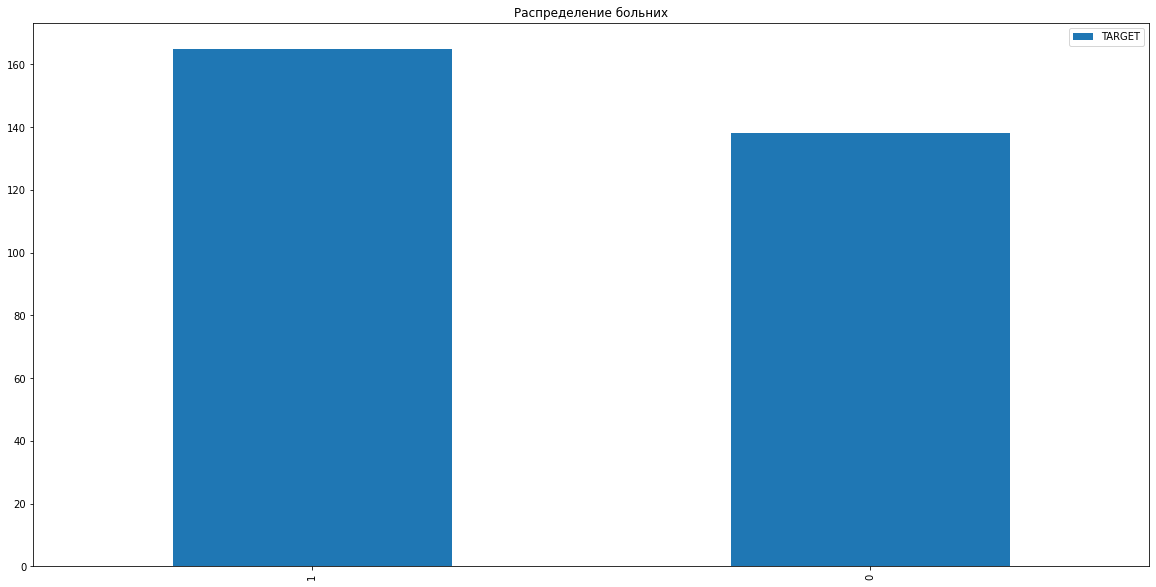

In [36]:
df['TARGET'].value_counts().plot(kind='bar', label='TARGET')
plt.legend()
plt.title('Распределение больних');

In [37]:
#Логит модель
model = LogisticRegression(solver='liblinear', random_state=0)

In [38]:
model.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [39]:
#Создаем модель и обучаем её
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

In [40]:
confusion_matrix(y, model.predict(X))

array([[105,  33],
       [ 12, 153]], dtype=int64)

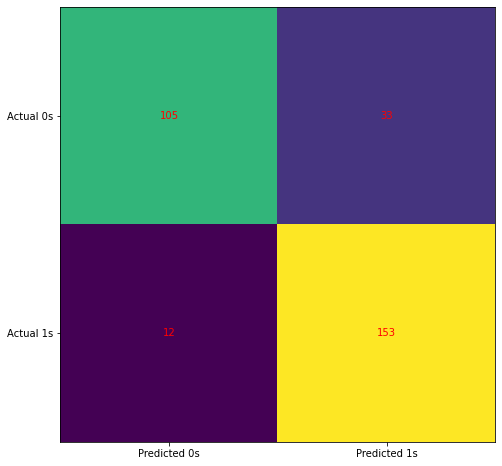

In [41]:
# Обучаем ставшую родной логистическую регрессию

cm = confusion_matrix(y, model.predict(X))

# Воспользуемся функцией построения матрицы ошибок из документации sklearn
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [42]:
#Оценка качество модели с помощью функции f1_score
>>> print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       138
           1       0.82      0.93      0.87       165

    accuracy                           0.85       303
   macro avg       0.86      0.84      0.85       303
weighted avg       0.86      0.85      0.85       303



In [44]:
# Step 4: Evaluate the model
p_pred = model.predict_proba(X)
y_pred = model.predict(X)
score_ = model.score(X, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [45]:
#Оценка качество модели с помощью функции f1_score
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       138
           1       0.82      0.93      0.87       165

    accuracy                           0.85       303
   macro avg       0.86      0.84      0.85       303
weighted avg       0.86      0.85      0.85       303



In [47]:
import numpy as np
import statsmodels.api as sm
X = sm.add_constant(X)

In [50]:
model = sm.Logit(y, X)

In [51]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


In [52]:
#Смотрим на резултат
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:                  0.4937
Time:                        15:22:06   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.262e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4505      2.571      1.342      0.180      -1.590       8.490
AGE           -0.0049      0.023     -0.212      0.832      -0.050       0.041
GENDER        -1.7582      0.469     -3.751      0.000      -2.677      -0.839
FEATURE_1      0.8599      0.185      4.638      0.000       0.496       1.223
FEATURE_2     -0.0195      0.010     -1.884      0.060      -0.040       0.001
FEATURE_3     -0.0046      0.004     -1.224      0.221      -0.012       0.003
FEATURE_4      0.0349      0.529      0.066      0.947      -1.003       1.073
FEATURE_5      0.4663      0.348      1.339      0.181      -0.216       1.149
FEATURE_6      0.0232      0.010      2.219      0.026       0.003       0.044
FEATURE_7     -0.9800      0.410     -2.391      0.017      -1.783      -0.177
FEATURE_8     -0.5403      0.214     -2.526      0.012      -0.959      -0.121
FEATURE_9      0.5793      0.350      1.656      0.098      -0.106       1.265
FEATURE_10    -0.7733      0.191     -4.051      0.000      -1.147      -0.399
FEATURE_11    -0.9004      0.290     -3.104      0.002      -1.469      -0.332
==============================================================================
"""

In [ ]:
# %load https://raw.githubusercontent.com/dib-lab/khmer/master/scripts/fastq-to-fasta.py
#! /usr/bin/env python
# This file is part of khmer, https://github.com/dib-lab/khmer/, and is
# Copyright (C) 2010-2015, Michigan State University.
# Copyright (C) 2015, The Regents of the University of California.
#
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are
# met:
#
#     * Redistributions of source code must retain the above copyright
#       notice, this list of conditions and the following disclaimer.
#
#     * Redistributions in binary form must reproduce the above
#       copyright notice, this list of conditions and the following
#       disclaimer in the documentation and/or other materials provided
#       with the distribution.
#
#     * Neither the name of the Michigan State University nor the names
#       of its contributors may be used to endorse or promote products
#       derived from this software without specific prior written
#       permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS
# "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT
# LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR
# A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT
# HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL,
# SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT
# LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE,
# DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY
# THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
# (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
# OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
#
# Contact: khmer-project@idyll.org
# pylint: disable=invalid-name,missing-docstring

"""
Convert FASTQ files to FASTA format.

% python scripts/fastq-to-fasta.py [ -n -o ] <fastq_name>

Use '-h' for parameter help.
"""
import sys
import screed
from khmer import __version__
from khmer.kfile import (add_output_compression_type, get_file_writer,
                         describe_file_handle)
from khmer.utils import write_record
from khmer.khmer_args import sanitize_help, KhmerArgumentParser
from khmer.khmer_args import FileType as khFileType


def get_parser():
    parser = KhmerArgumentParser(
        description='Converts FASTQ format (.fq) files to FASTA format (.fa).')

    parser.add_argument('input_sequence', help='The name of the input'
                        ' FASTQ sequence file.')
    parser.add_argument('-o', '--output', metavar="filename",
                        type=khFileType('wb'),
                        help='The name of the output'
                        ' FASTA sequence file.',
                        default=sys.stdout)
    parser.add_argument('-n', '--n_keep', default=False, action='store_true',
                        help='Option to keep reads containing \'N\'s in '
                             'input_sequence file. Default is to drop reads')
    add_output_compression_type(parser)
    return parser


def main():
    args = sanitize_help(get_parser()).parse_args()

    print('fastq from ', args.input_sequence, file=sys.stderr)
    outfp = get_file_writer(args.output, args.gzip, args.bzip)
    n_count = 0
    for n, record in enumerate(screed.open(args.input_sequence)):
        if n % 10000 == 0:
            print('...', n, file=sys.stderr)

        sequence = record['sequence']

        if 'N' in sequence:
            if not args.n_keep:
                n_count += 1
                continue

        del record['quality']
        write_record(record, outfp)

    print('\n' + 'lines from ' + args.input_sequence, file=sys.stderr)

    if not args.n_keep:
        print(str(n_count) + ' lines dropped.', file=sys.stderr)

    else:
        print('No lines dropped from file.', file=sys.stderr)

    print('Wrote output to', describe_file_handle(args.output),
          file=sys.stderr)


if __name__ == '__main__':
    main()
